### Bitwise Operations 
So far we have had a look at some basic aithmetic operations. Now let's look at some of the bitwise operations in OpenCV:

- AND operation: cv2.bitwise_and

- OR operation: cv2.bitwise_or

- NOT operation: cv2.bitwise_not

- XOR operation: cv2.bitwise_xor

Among all the bitwsie operations, the AND operation is the most used.

### Function Syntax
dst    =    cv.bitwise_XXX(    src1, src2 [, dst [,  mask]]    )
XXX stands for the operation

Parameters

- src1 - first input.
- src2 - second input.
- dst - output array that has the same size and type as the input array.
- mask - optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed. The operation is applied only on those pixels of the input images where the mask is non-zero.

The operation is applied elementwise between two matrices. The two inputs should be of the same size for this operation.

Here's a cheat sheet on the input and output table for these bitwise operations.

file:///home/adelard/opencv_projects/computer-vision/data/Screenshot%20from%202019-09-08%2016-42-20.png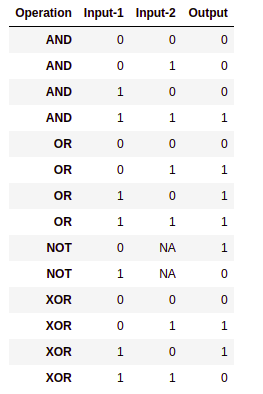

These are useful when extracting any part of the image, defining and working with non-rectangular ROI etc.

### Example

To understand the usage of these functions, let us take the sunglass filter example from the previous section and use bitwise operations to arrive at the same result.

We will follow the same steps, but instead of arithmetic operations like MULTIPLY & ADD , we will use bitwise operations like AND, NOT and OR.

In [1]:
# Importing librairies
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (6.0, 6.0)
mpl.rcParams['image.cmap'] = 'gray'

face image dimension =(50, 150, 4)


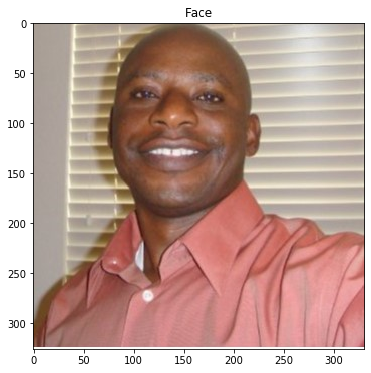

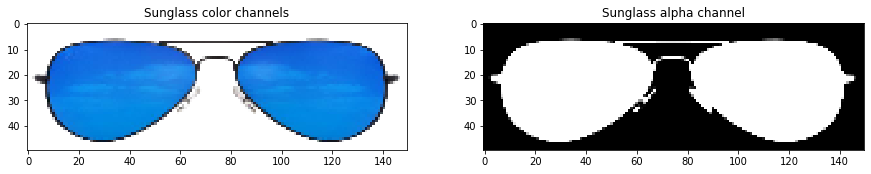

In [3]:
# Load the face image
face_image_path = DATA_PATH + 'images/face.jpg'
face_image = cv2.imread(face_image_path)

plt.imshow(face_image[:,:,::-1])
plt.title('Face')


# Load the sunglass image with alpha channel 
# (http://pluspng.com/sunglass-png-1104.html)
sunglass_image_path = DATA_PATH + 'images/sunglass.png'
sunglass_image = cv2.imread(sunglass_image_path, -1)

# Resize the image to fit over the eye region
sunglass_image = cv2.resize(sunglass_image, (150, 50))
print('face image dimension ={}'.format(sunglass_image.shape))

# Separate the color and alpha channels
sunglass_image_BGR = sunglass_image[:, :, 0:3]
sunglass_image_Mask1 = sunglass_image[:, :, 3]

# Display the images for clarity
plt.figure(figsize=[15, 15])
plt.subplot(121)
plt.imshow(sunglass_image_BGR[:, :, ::-1])
plt.title('Sunglass color channels')

plt.subplot(122)
plt.imshow(sunglass_image_Mask1, cmap='gray')
plt.title('Sunglass alpha channel')

plt.show()

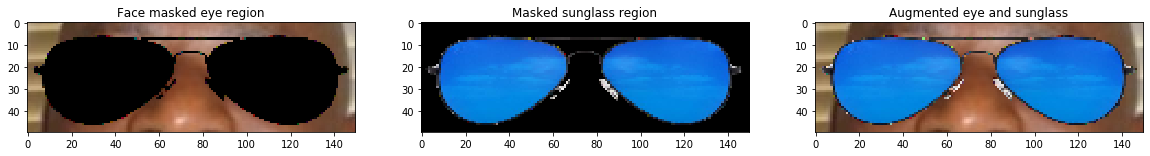

In [5]:
# Get the eye region from the face image
face_eye_region = face_image_with_math[50:100, 70:220]

### Make the dimensions of the mask same as the input image.
# Since face image sample is a 3-channel image, we create a 3-channel image for the mask
sunglass_mask = cv2.merge((sunglass_image_Mask1, sunglass_image_Mask1, sunglass_image_Mask1))

# Use the mask to create the masked eye region
face_masked_eye = cv2.bitwise_and(face_eye_region, cv2.bitwise_not(sunglass_mask))

# Use the mask to create the masked sunglass region
masked_sunglass = cv2.bitwise_and(sunglass_image_BGR, sunglass_mask)

# Combine the sunglass in the eye region area to get the augmented image
face_eye_region_final = cv2.bitwise_or(face_masked_eye, masked_sunglass)

# Display the intermediate results
plt.figure(figsize=[20, 20])
plt.subplot(131)
plt.imshow(face_masked_eye[..., ::-1])
plt.title('Face masked eye region')

plt.subplot(132)
plt.imshow(masked_sunglass[..., ::-1])
plt.title('Masked sunglass region')

plt.subplot(133)
plt.imshow(face_eye_region_final[..., ::-1])
plt.title('Augmented eye and sunglass')

plt.show()

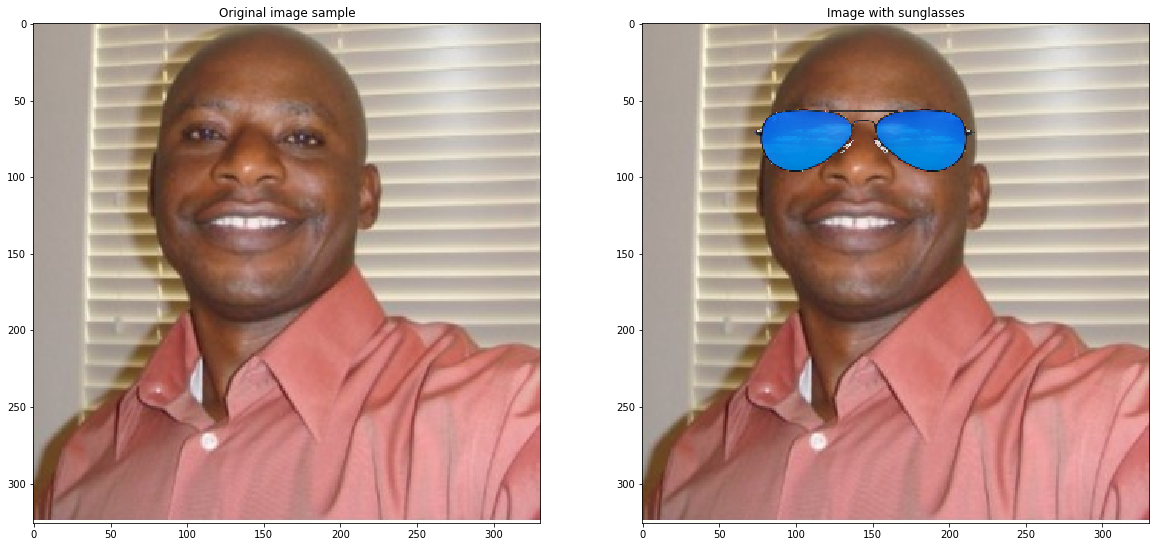

In [6]:
# Replace the eye region with the output from previous section
face_image_with_math[50:100, 70:220] = face_eye_region_final

# Display the final result
plt.figure(figsize=[20, 20])
plt.subplot(121)
plt.imshow(face_image[:, :, ::-1])
plt.title('Original image sample')

plt.subplot(122)
plt.imshow(face_image_with_math[:, :, ::-1])
plt.title('Image with sunglasses')

plt.show()